#Klasifikacija slika dimenzija 32x32 CIFAR10
Srđan Topić IN19/2018 --- Nikola Savić IN35/2018

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

###Ucitavanje baze

U bazi se nalazi 50000 uzoraka za trening i 10000 uzoraka za test

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("Uzoraka za treniranje ima: ", len(X_train))
print("Uzoraka za testiranje ima: ", len(X_test))

Uzoraka za treniranje ima:  50000
Uzoraka za testiranje ima:  10000


X_train i X_test za svaki uzorak sadrzi 32x32 RGB vrijednosti (od 0 do 255) tj. za svaki piksel slike sadrzi sadrzi vrijednost za Red, Green i Blue.
y_train i y_test za svaki uzorak sadrzi cijeli broj (od 0 do 9) koji govori koja je slika predstavljena.

In [ ]:
print("X_train oblik: ", X_train.shape)
print("y_train oblik: ", y_train.shape)

X_train oblik:  (50000, 32, 32, 3)
y_train oblik:  (50000, 1)


In [ ]:
print(y_train)
print(y_train[:,0])

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[6 9 9 ... 9 1 1]


y_train je matrica kojoj je ispunjena samo prva kolona, te cemo je prebaciti u jednodimenzionalan niz sa istim vrijednostima i isto cemo uraditi za y_test

In [ ]:
y_train = y_train.reshape(-1,)
print(y_train)

[6 9 9 ... 9 1 1]


In [ ]:
y_test = y_test.reshape(-1,)
print(y_test)

[3 8 8 ... 5 1 7]


Napravicemo niz sa nazivima klasa

In [ ]:
classes = ["avion","auto","ptica","macka","jelen","pas","zaba","konj","brod","kamion"]

Definisanje funkcije za predstavljanje jedne slike

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

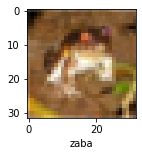

In [ ]:
plot_sample(X_train, y_train, 0)

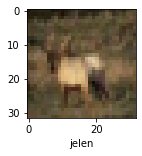

In [ ]:
plot_sample(X_train, y_train, 3)

####Normalizacija podataka

Normalizacijom se prebacuju podaci u vrijednosti izmedju 0 i 1, a posto su to vrijednosti RGB (od 0 do 255), dijelimo sa 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##Konvoluciona neuralna mreza (CNN)

u Conv2D filters parametar sluzi za odredjivanje broj filtera u tom sloju konvolucije, ketnel_size parametar sluzi za definisanje dimenzija filtera i activation parametrom biramo funkciju koju cemo primjeniti na dobijene vrijednosti nakon konvolucije. 
MaxPooling-om smanjujemo dimenzionalnost, tako sto u ovo slucaju uzmemo 2x2 filter i provlacimo kroz sliku sa pomjerajem od 1(stride=1) i uzimamo najvecu vrijednost koja se nadje u tom 2x2 filteru

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Najveca moguca preciznost sto se postigla je oko 67%, za optimizer='Adam', activation = 'relu' i 'softmax'. Kernel_size=(3,3). Promjenom svakog od parametara bi rezultovalo losijim rezultatima i preciznoscu. Preciznost se moze poboljsati, ako se izbaci sloj za Droupou, ali onda se povecava sansa za natprilagodjavanjem. Takodje se moze i poboljsati preciznost povecavanjem broja epoha u treniranju, ali to zahtjeva mnogo vise vremena.

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 8ms/step - loss: 1.5701 - accuracy: 0.4263
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2680 - accuracy: 0.5471
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1553 - accuracy: 0.5917
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0769 - accuracy: 0.6210
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0311 - accuracy: 0.6343
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9889 - accuracy: 0.6529
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9478 - accuracy: 0.6656
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9189 - accuracy: 0.6759
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8939 - accuracy: 0.6845
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.8404 - accuracy: 0.7104


[0.8403996229171753, 0.7103999853134155]

Kada se izvrsi cnn.predictm, dobijemo y_pred, koji za svaki uzorak iz X_test sadrzi niz od 10 vrijednosti(za svaku klasu) izmedju 0 i 1, te radicemo onda argmax(vrijednost) da se dobije najeveca vrijednost, tj. klasa koja je najbliza rjesenju.

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.4759951e-04, 7.6952047e-04, 1.5677346e-03, 4.8948678e-01,
        6.0752226e-04, 4.5907861e-01, 2.9746192e-02, 4.6943870e-04,
        1.7111737e-02, 6.1478035e-04],
       [1.7998613e-03, 6.4206466e-02, 9.1933963e-08, 1.3203299e-07,
        3.9950936e-09, 7.4231496e-11, 9.0654852e-11, 1.0040785e-09,
        9.3298185e-01, 1.0115588e-03],
       [7.1448244e-02, 2.4166140e-01, 2.0063103e-03, 2.0634744e-03,
        1.8285582e-04, 6.7631561e-05, 4.6701771e-05, 1.8721817e-04,
        6.3136661e-01, 5.0969526e-02],
       [4.9962726e-01, 3.6745709e-03, 8.7071778e-03, 5.8899896e-04,
        1.3419165e-03, 3.2218755e-05, 4.8650731e-05, 7.7316508e-05,
        4.8471695e-01, 1.1849230e-03],
       [1.2276445e-05, 9.6363865e-06, 4.9741331e-02, 1.7303271e-02,
        3.6253342e-01, 3.5489888e-03, 5.6683052e-01, 8.8751867e-06,
        6.9053749e-06, 4.8650340e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Classification Report: 
               precision    recall  f1-score   support

       avion       0.76      0.73      0.75      1000
        auto       0.86      0.81      0.84      1000
       ptica       0.55      0.66      0.60      1000
       macka       0.51      0.52      0.52      1000
       jelen       0.71      0.60      0.65      1000
         pas       0.57      0.67      0.62      1000
        zaba       0.81      0.75      0.78      1000
        konj       0.80      0.72      0.76      1000
        brod       0.81      0.81      0.81      1000
      kamion       0.81      0.82      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



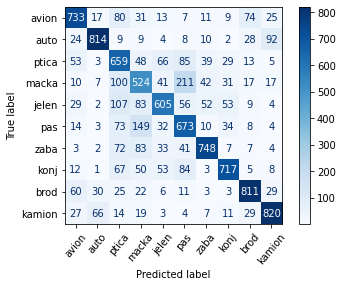

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes, target_names=classes))
conf_mat = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat,  display_labels=classes)
disp.plot(cmap="Blues", values_format='', xticks_rotation=50)  
plt.show()

Text(0.5, 1.0, 'predvidjeni: macka\npravi: macka')

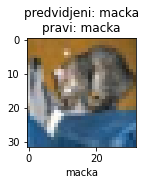

In [ ]:
plot_sample(X_test, y_test,0)
title_pred = classes[y_classes[0]]
title_real = classes[y_test[0]]
title = "predvidjeni: " + title_pred + "\n" + "pravi: " + title_real
plt.title(title)

####Unakrsna validacija

In [ ]:
X_cross = np.concatenate((X_train, X_test))
y_cross = np.concatenate((y_train, y_test))

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.5744 - accuracy: 0.4255
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2432 - accuracy: 0.5585
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.1232 - accuracy: 0.6039
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0491 - accuracy: 0.6300
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9966 - accuracy: 0.6518
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9532 - accuracy: 0.6665
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.9159 - accuracy: 0.6792
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8822 - accuracy: 0.6918
Epoch 9/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8534 - accuracy: 0.6975
Epoch 10/10
1500/1500 [==============================] - 12s 8ms/step - l

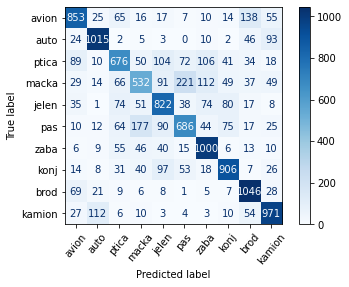

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.5836 - accuracy: 0.4229
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2642 - accuracy: 0.5511
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.1505 - accuracy: 0.5935
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0737 - accuracy: 0.6209
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0191 - accuracy: 0.6419
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9763 - accuracy: 0.6567
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9426 - accuracy: 0.6672
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9055 - accuracy: 0.6796
Epoch 9/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8804 - accuracy: 0.6868
Epoch 10/10
1500/1500 [==============================] - 14s 10ms/step - 

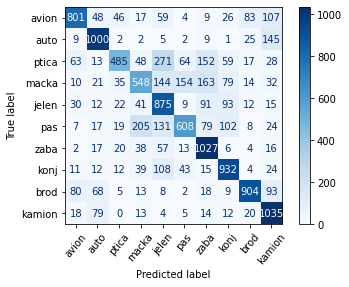

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 1.6044 - accuracy: 0.4150
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2756 - accuracy: 0.5470
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.1600 - accuracy: 0.5877
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 1.0938 - accuracy: 0.6141
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0323 - accuracy: 0.6374
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.9886 - accuracy: 0.6507
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9534 - accuracy: 0.6642
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9202 - accuracy: 0.6753
Epoch 9/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8885 - accuracy: 0.6876
Epoch 10/10
1500/1500 [==============================] - 13s 9ms/step - 

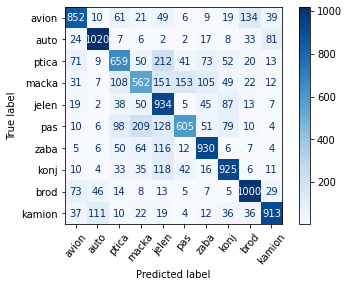

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 1.5661 - accuracy: 0.4300
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2473 - accuracy: 0.5552
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.1335 - accuracy: 0.5980
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0576 - accuracy: 0.6282
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0039 - accuracy: 0.6478
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9690 - accuracy: 0.6597
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9224 - accuracy: 0.6759
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8924 - accuracy: 0.6854
Epoch 9/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8680 - accuracy: 0.6943
Epoch 10/10
1500/1500 [==============================] - 12s 8ms/step - l

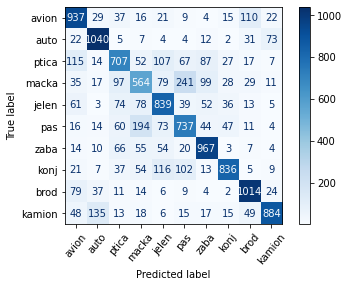

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.6574 - accuracy: 0.3929
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.3451 - accuracy: 0.5184
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.2343 - accuracy: 0.5610
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.1586 - accuracy: 0.5873
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.1055 - accuracy: 0.6104
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0565 - accuracy: 0.6307
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0184 - accuracy: 0.6405
Epoch 8/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9870 - accuracy: 0.6515
Epoch 9/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9553 - accuracy: 0.6624
Epoch 10/10
1500/1500 [==============================] - 12s 8ms/step - l

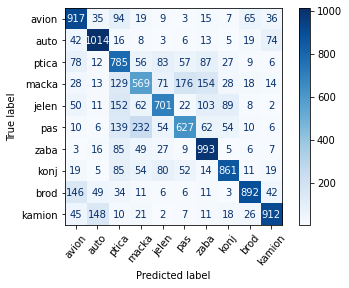

finalna matrica za cnn: 


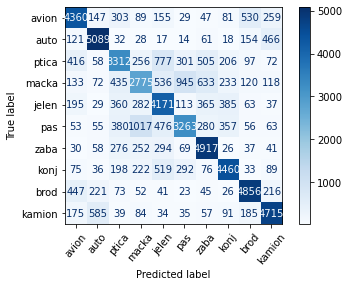

procenat pogođenih uzoraka je:  69.86333333333333 %


In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True)
indexes = kf.split(X_cross, y_cross)
fin_conf_mat_rf = np.zeros((len(np.unique(y_cross)),len(np.unique(y_cross))))

for train_index, test_index in indexes:
  cnnCross = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
  ])
  cnnCross.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  cnnCross.fit(X_cross[train_index,:], y_cross[train_index], epochs=10)
  y_predCross = cnnCross.predict(X_cross[test_index,:])
  y_classesCross = [np.argmax(element) for element in y_predCross]
  conf_matCross = confusion_matrix(y_cross[test_index], y_classesCross)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matCross,  display_labels=classes)
  disp.plot(cmap="Blues", values_format='',  xticks_rotation=50)  
  plt.show()
  fin_conf_mat_rf += conf_matCross

print('finalna matrica za cnn: ')
disp = ConfusionMatrixDisplay(confusion_matrix = fin_conf_mat_rf.astype('int'),  display_labels=classes)
disp.plot(cmap="Blues", values_format='',  xticks_rotation=50)  
plt.show()

print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf))*100, '%')

preciznost koriscenjem unakrsne validacije je oko 69%